In [1]:
%load_ext watermark
%watermark -v -p numpy,scipy,sklearn,pandas,matplotlib

CPython 3.6.5
IPython 6.4.0

numpy 1.14.5
scipy 1.1.0
sklearn 0.19.1
pandas 0.22.0
matplotlib 2.1.2


# Setting

In [6]:
import numpy as np
import os

# 일관된 출력을 위해 유사난수 초기화
np.random.seed(42)

# Matplotlib setting
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 한글출력
matplotlib.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

# 그림을 저장할 폴드
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Normal Equation and Linear Regression

In [7]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

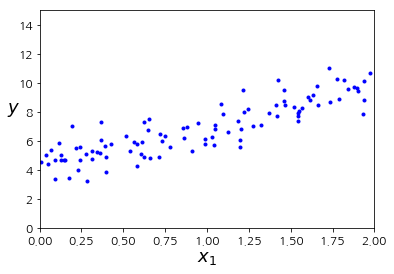

In [9]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [12]:
# 상수항 추가
X_b = np.c_[np.ones((100, 1)), X]

**Normal Equation**

$
\hat{\boldsymbol{\theta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
$

In [13]:
XTX = np.linalg.inv(X_b.T.dot(X_b))
XT = X_b.T

In [14]:
theta_best = XTX.dot(XT).dot(y)

In [15]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [16]:
X_new = np.array([[0],[2]])

In [17]:
X_new

array([[0],
       [2]])

In [20]:
# 상수항 추가
X_new_b = np.c_[np.ones((2,1)), X_new]

In [21]:
y_predict = X_new_b.dot(theta_best)

In [22]:
y_predict

array([[4.21509616],
       [9.75532293]])

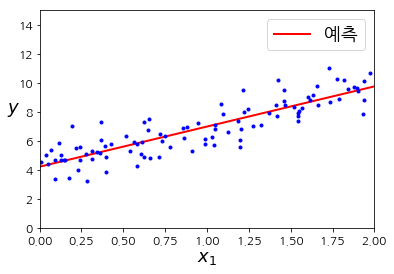

In [30]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="예측")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc='best', fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [31]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [32]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

`LinearRegression` 클래스는 scipy.linalg.lstsq() 함수("least squares"의 약자)를 사용하므로 직접 호출할 수 있습니다:

In [35]:
theta_best_svd, residuals, rank, s = \
        np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

이 함수는 $\mathbf{X}^+\mathbf{y}$을 계산합니다. $\mathbf{X}^{+}$는 $\mathbf{X}$의 _유사역행렬_(pseudoinverse)입니다(Moore–Penrose 유사역행렬입니다). `np.linalg.pinv()`을 사용해서 유사역행렬을 직접 계산할 수 있습니다:

In [36]:
np.linalg.pinv(X_b).dot(y)

array([[4.21509616],
       [2.77011339]])

# Gradient Descent

In [48]:
eta = 0.1
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)

In [49]:
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta * gradients

In [50]:
theta

array([[4.21509616],
       [2.77011339]])

In [51]:
X_new_b.dot(theta)

array([[4.21509616],
       [9.75532293]])

In [58]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style, 
                     alpha=1/(iteration+1))
        gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

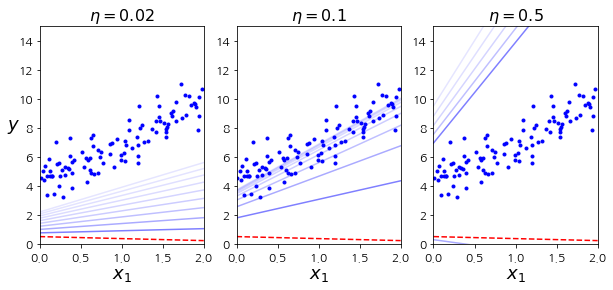

In [59]:
np.random.seed(42)
theta = np.random.randn(2,1) # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1,
                    theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)
plt.show()

# Stochastic Gradient Descent

In [60]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

In [ ]:
n_epochs = 50
t0, t1 = 5, 50 # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) # 무작위 초기화

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:
            y_predict = X_new_b.dot(theta)
            style = "b-" if i > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)